In [4]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [6]:
# define transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])

#download and load the training , test dataset
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

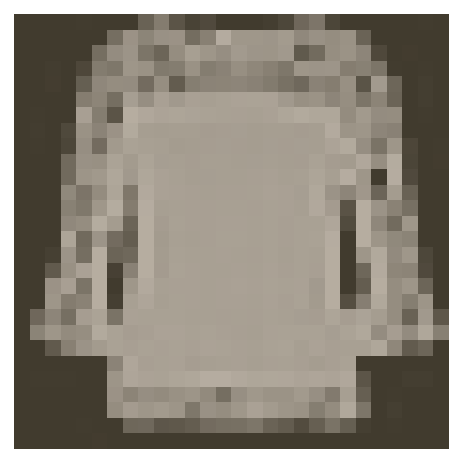

In [8]:
#here we can see one of the sample
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [10]:
#train a network
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [11]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs = 2)

Epoch: 1/2..  Training Loss: 1.708..  Test Loss: 1.020..  Test Accuracy: 0.579
Epoch: 1/2..  Training Loss: 1.045..  Test Loss: 0.792..  Test Accuracy: 0.719
Epoch: 1/2..  Training Loss: 0.896..  Test Loss: 0.680..  Test Accuracy: 0.748
Epoch: 1/2..  Training Loss: 0.779..  Test Loss: 0.643..  Test Accuracy: 0.761
Epoch: 1/2..  Training Loss: 0.766..  Test Loss: 0.630..  Test Accuracy: 0.760
Epoch: 1/2..  Training Loss: 0.715..  Test Loss: 0.616..  Test Accuracy: 0.768
Epoch: 1/2..  Training Loss: 0.705..  Test Loss: 0.589..  Test Accuracy: 0.766
Epoch: 1/2..  Training Loss: 0.674..  Test Loss: 0.559..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.668..  Test Loss: 0.551..  Test Accuracy: 0.793
Epoch: 1/2..  Training Loss: 0.683..  Test Loss: 0.553..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.633..  Test Loss: 0.543..  Test Accuracy: 0.796
Epoch: 1/2..  Training Loss: 0.661..  Test Loss: 0.535..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.622..  Test Loss: 0.5

In [12]:
#saving and loading network
print("out model: ", model, "\n")
print("The state dict keys: ", model.state_dict().keys())

out model:  Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys:  odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [13]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [16]:
state_dict = torch.load('checkpoint.pth')
print(model.state_dict())

OrderedDict([('hidden_layers.0.weight', tensor([[-6.9791e-04, -1.1705e-03,  1.4337e-02,  ...,  3.1200e-02,
          2.7579e-02,  4.2980e-02],
        [-7.5358e-04,  1.6165e-02,  2.6973e-02,  ...,  1.2017e-02,
          3.6671e-02,  3.4743e-02],
        [ 4.2716e-02,  1.9145e-02,  1.1362e-02,  ...,  1.2866e-02,
         -2.7706e-03,  3.3769e-02],
        ...,
        [ 6.4291e-03,  5.6101e-02,  2.7012e-02,  ...,  3.3353e-02,
          3.6795e-02,  2.3278e-02],
        [ 1.0439e-02,  3.0693e-02, -1.2624e-02,  ...,  3.5162e-02,
         -3.4113e-03, -1.8872e-05],
        [-3.2655e-02,  2.5312e-02, -1.6183e-02,  ..., -2.7504e-02,
          8.0164e-03,  1.0547e-02]])), ('hidden_layers.0.bias', tensor([-1.4516e-02,  1.5429e-02,  3.5447e-03, -3.8127e-02, -1.1379e-02,
         7.2259e-04, -5.8317e-03,  1.4509e-03,  1.3423e-02, -2.7861e-02,
        -1.5601e-02,  5.3909e-03, -8.0079e-03,  2.8386e-02, -1.5186e-02,
         7.5080e-03, -3.4569e-02, -5.7232e-02, -6.4724e-03,  2.7056e-02,
        -

In [17]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [19]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [20]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
